# **Predictive Model for Early Detection of Heart Disease**
By Jeremiah Asala, Aaron Leung and Yuze Zhang

## Setup

In [78]:
# import numpy as np
import pandas as pd

from google.colab import files

# upload file to drive
uploaded = files.upload()

In [79]:
# read dataset
dataset = pd.read_csv("/content/heart_disease_health_indicators_BRFSS2015.csv")

dataset

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## I. Data Exploration






#### General Exploration

In [80]:
# columns in the dataset
dataset.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [81]:
# dataset description
dataset.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [82]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

**Observation: all columns are numerical**

#### Analyzing Features of the Dataset

In [83]:
# count of rows/records for each class
dataset['HeartDiseaseorAttack'].value_counts(dropna = False)

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

<Axes: ylabel='HeartDiseaseorAttack'>

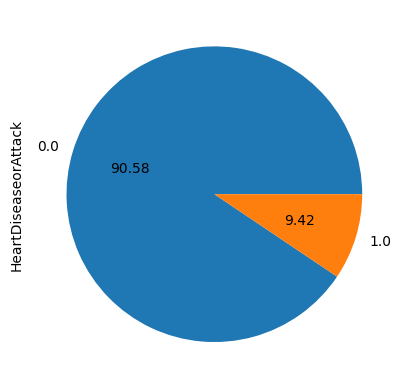

In [84]:
"""
Visualize class imbalance (HeartDiseaseorAttack) using pie plot
built in function using pandas
"""
dataset['HeartDiseaseorAttack'].value_counts().plot.pie(autopct='%.2f')

In [85]:
# install library to deal with class imbalance
! pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Observation: There is a heavy class imbalance for 'HeartDiseaseorAttack' feature**

### Individual Features:

##### 1. HighBP

In [86]:
# import libs
import seaborn as sb
import matplotlib.pyplot as plt

<Axes: ylabel='HighBP'>

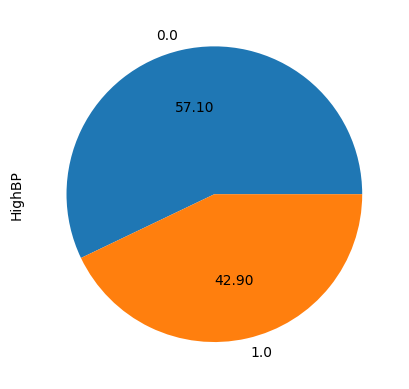

In [87]:
"""
Examine value counts of HighBP column
"""
dataset['HighBP'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean BP')

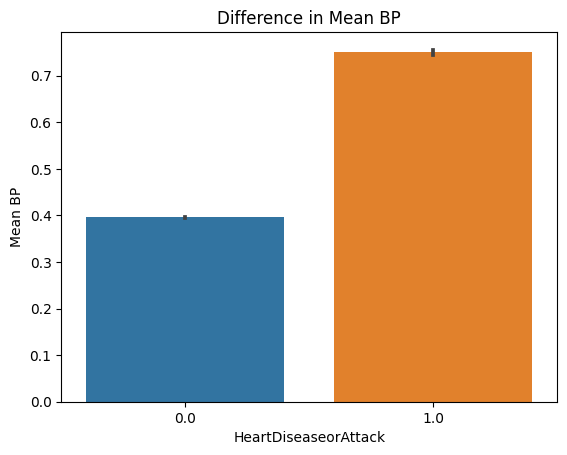

In [88]:
# bar plot of mean BP
sb.barplot( x = 'HeartDiseaseorAttack', y = 'HighBP', data = dataset) 
plt.ylabel('Mean BP') 
plt.title('Difference in Mean BP')

**Observation: People with high BP are more likely to have heart disease**

#####2. HighChol

<Axes: ylabel='HighChol'>

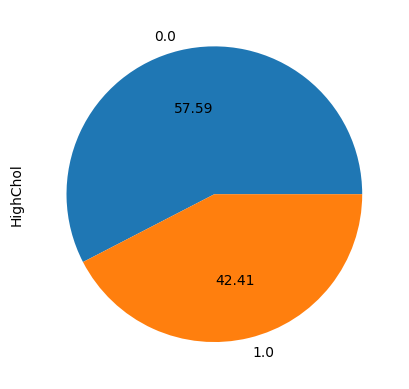

In [89]:
"""
Examine value counts of HighChol column
"""
dataset['HighChol'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean Chol')

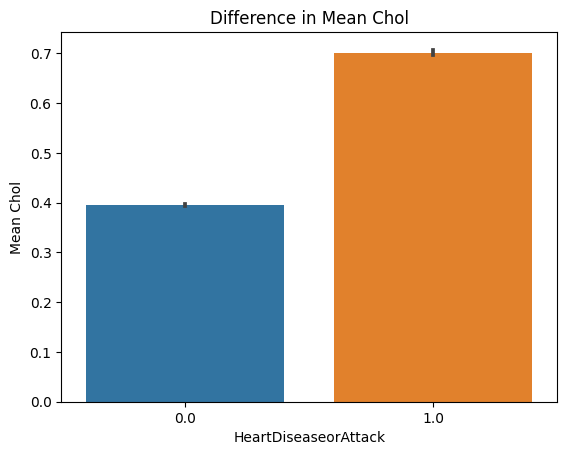

In [90]:
# bar plot of mean Chol
sb.barplot( x = 'HeartDiseaseorAttack', y = 'HighChol', data = dataset) 
plt.ylabel('Mean Chol') 
plt.title('Difference in Mean Chol')

**Observation: People with high cholesterol levels have higher mean**

#####3. Smoker

<Axes: ylabel='Smoker'>

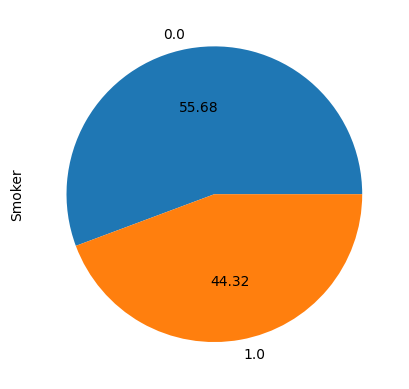

In [91]:
"""
Examine value counts of Smoker column
"""
dataset['Smoker'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean Smoker')

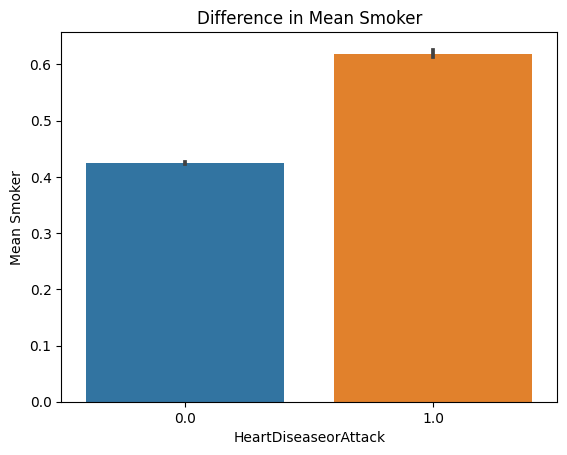

In [92]:
# bar plot of mean Smoker
sb.barplot( x = 'HeartDiseaseorAttack', y = 'Smoker', data = dataset) 
plt.ylabel('Mean Smoker') 
plt.title('Difference in Mean Smoker')

**Observation: People who smoke have higher mean**

#####4. Stroke

<Axes: ylabel='Stroke'>

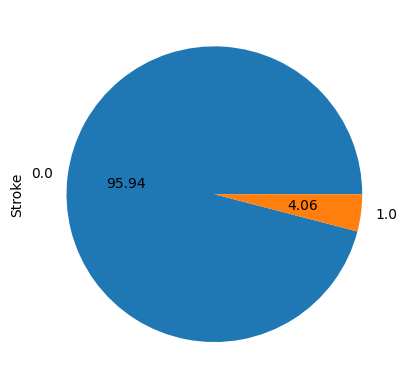

In [93]:
"""
Examine value counts of Stroke column
"""
dataset['Stroke'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean Stroke')

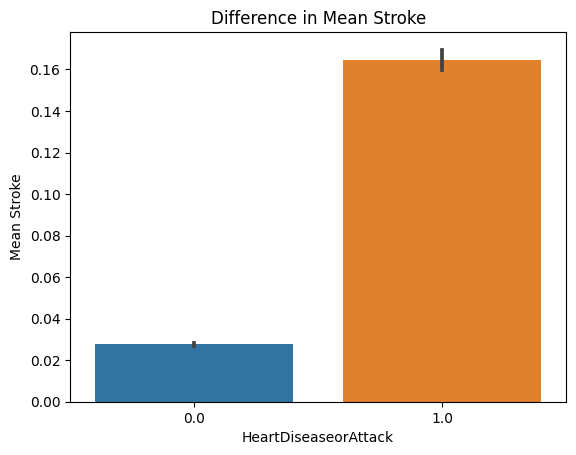

In [94]:
# bar plot of mean Stroke
sb.barplot( x = 'HeartDiseaseorAttack', y = 'Stroke', data = dataset) 
plt.ylabel('Mean Stroke') 
plt.title('Difference in Mean Stroke')

#####5. Diabetes

<Axes: ylabel='Diabetes'>

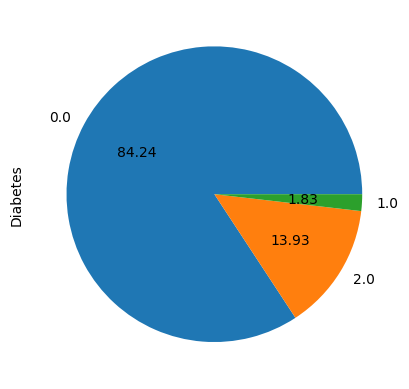

In [95]:
"""
Examine value counts of Diabetes column
"""
dataset['Diabetes'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean Diabetes')

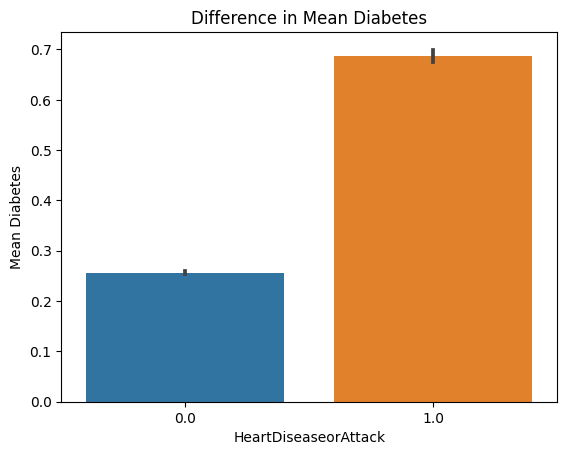

In [96]:
# bar plot of mean Diabetes
sb.barplot( x = 'HeartDiseaseorAttack', y = 'Diabetes', data = dataset) 
plt.ylabel('Mean Diabetes') 
plt.title('Difference in Mean Diabetes')

#####6. PhysicalActivity

<Axes: ylabel='PhysActivity'>

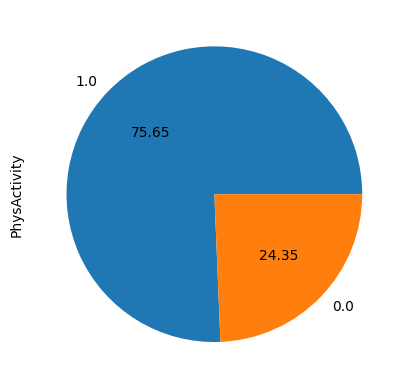

In [97]:
"""
Examine value counts of Physical Activity column
"""
dataset['PhysActivity'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean PhysActivity')

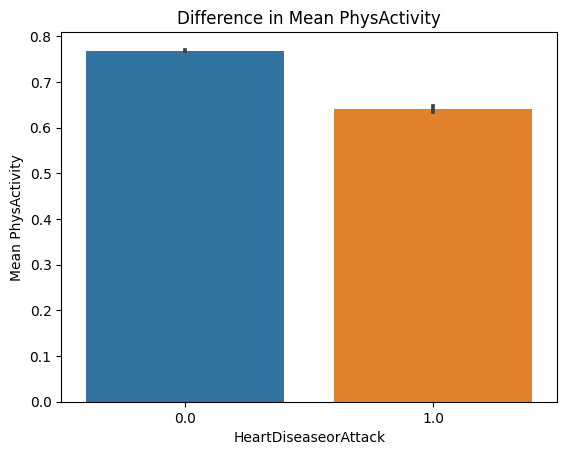

In [98]:
# bar plot of mean PhysActivity
sb.barplot( x = 'HeartDiseaseorAttack', y = 'PhysActivity', data = dataset) 
plt.ylabel('Mean PhysActivity') 
plt.title('Difference in Mean PhysActivity')

#####7. Heavy Alcohol Consumption

<Axes: ylabel='HvyAlcoholConsump'>

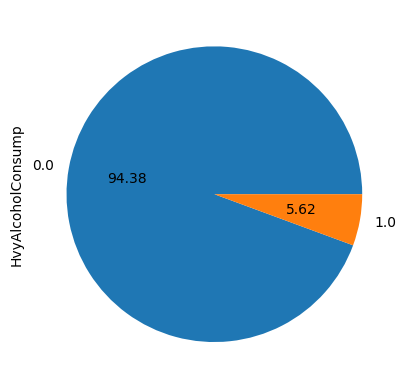

In [99]:
"""
Examine value counts of HvyAlcoholConsump column
"""
dataset['HvyAlcoholConsump'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean HvyAlcoholConsump')

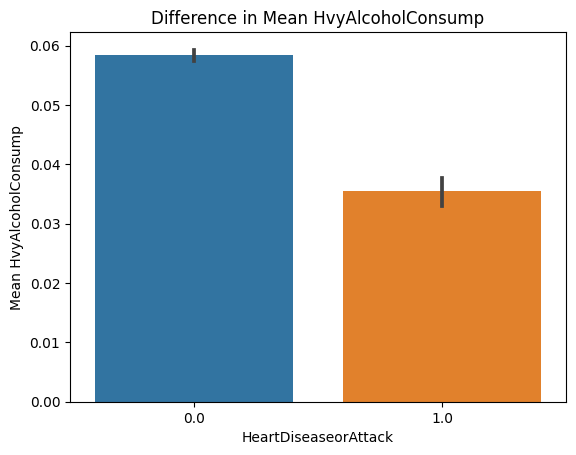

In [100]:
# bar plot of mean HvyAlcoholConsump
sb.barplot( x = 'HeartDiseaseorAttack', y = 'HvyAlcoholConsump', data = dataset) 
plt.ylabel('Mean HvyAlcoholConsump') 
plt.title('Difference in Mean HvyAlcoholConsump')

#####8. Sex

<Axes: ylabel='Sex'>

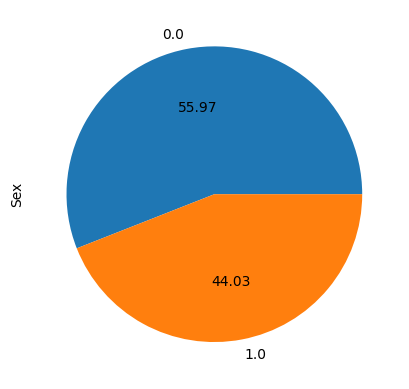

In [101]:
"""
Examine value counts of sex column
"""
dataset['Sex'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean Sex')

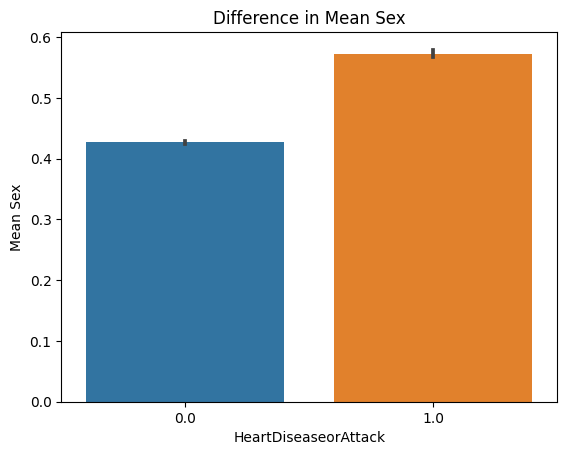

In [102]:
# bar plot of mean Sex
sb.barplot( x = 'HeartDiseaseorAttack', y = 'Sex', data = dataset) 
plt.ylabel('Mean Sex') 
plt.title('Difference in Mean Sex')

#####9. Age

<Axes: ylabel='Age'>

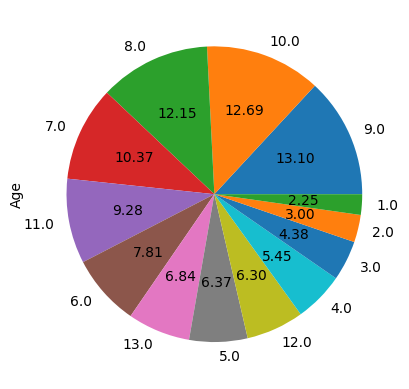

In [103]:
"""
Examine value counts of Age column
"""
dataset['Age'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean Age')

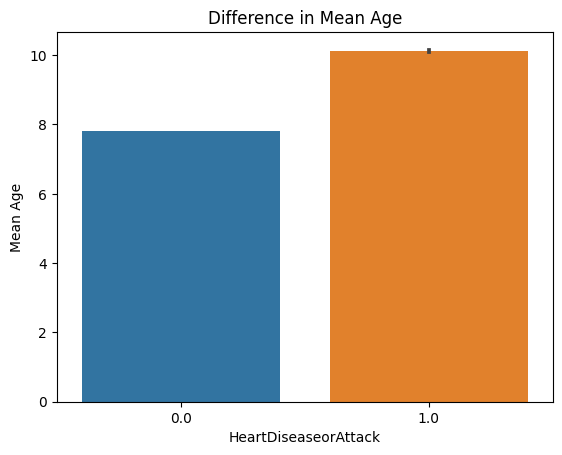

In [104]:
# bar plot of mean Age
sb.barplot( x = 'HeartDiseaseorAttack', y = 'Age', data = dataset) 
plt.ylabel('Mean Age') 
plt.title('Difference in Mean Age')

#####10. Education

<Axes: ylabel='Education'>

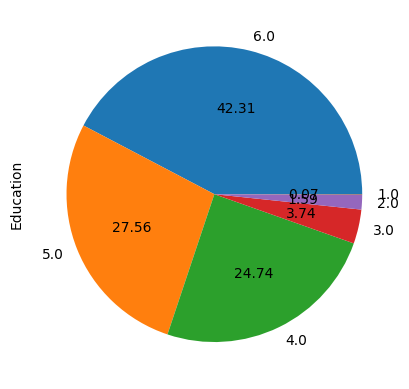

In [105]:
"""
Examine value counts of Education column
"""
dataset['Education'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean Education')

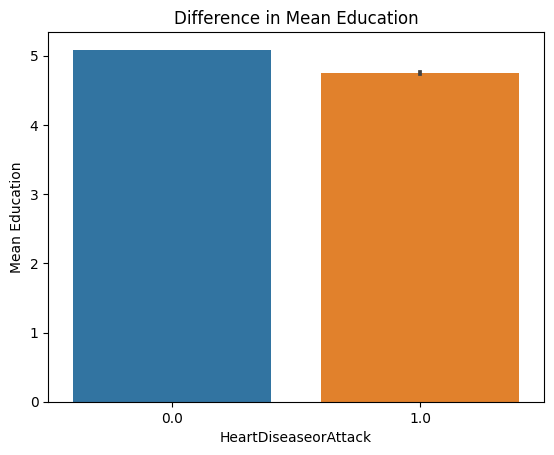

In [106]:
# bar plot of mean Education
sb.barplot( x = 'HeartDiseaseorAttack', y = 'Education', data = dataset) 
plt.ylabel('Mean Education') 
plt.title('Difference in Mean Education')

#####11. Income

<Axes: ylabel='Income'>

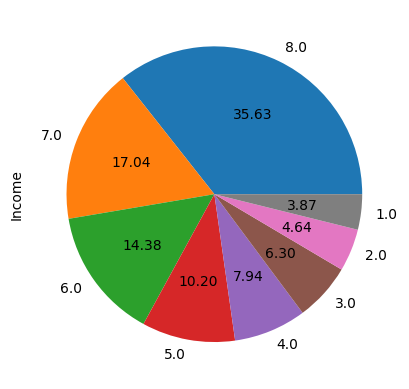

In [107]:
"""
Examine value counts of Income column
"""
dataset['Income'].value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Difference in Mean Income')

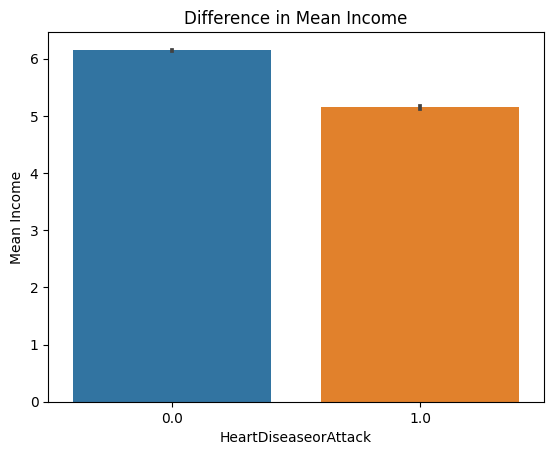

In [108]:
# bar plot of mean Income
sb.barplot( x = 'HeartDiseaseorAttack', y = 'Income', data = dataset) 
plt.ylabel('Mean Income') 
plt.title('Difference in Mean Income')

###Visualize correlation between feature using heatmap

<Axes: >

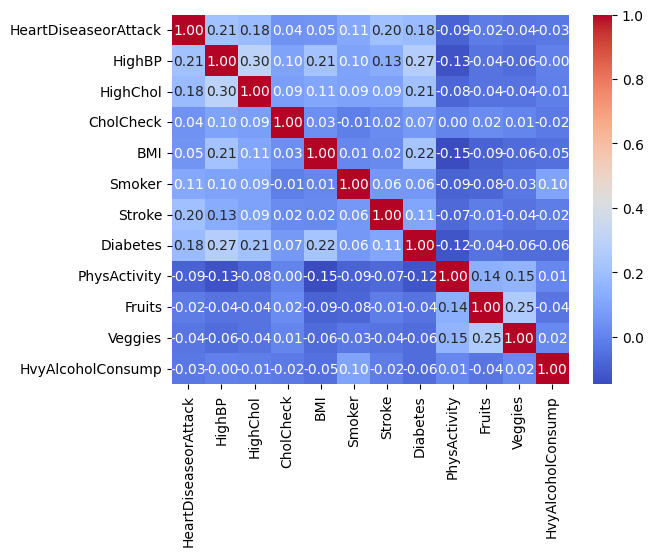

In [109]:
# Visualize correlation of features with respect to HeartDiseaseorAttack using heatmap
sb.heatmap(dataset[['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

<Axes: >

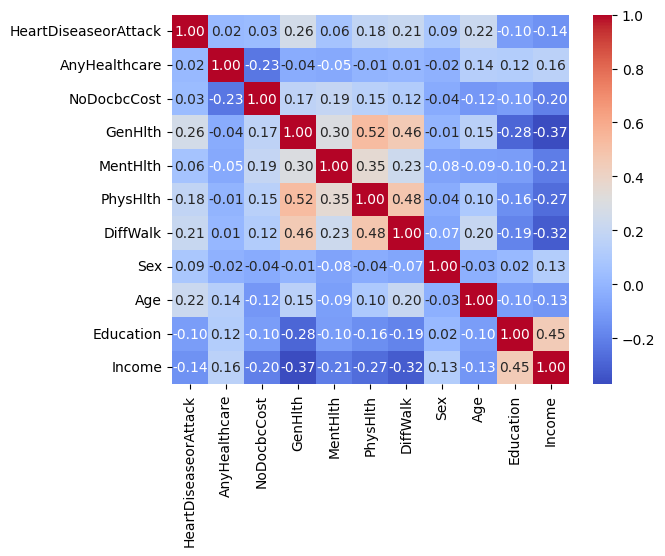

In [110]:
sb.heatmap(dataset[['HeartDiseaseorAttack','AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

## II. Feature Engineer

In [111]:
"""
Create LghtAlocholConsump from HvyAlcoholConsump so we can use it to calculate healtyLifestyle score
"""
dataset['LghtAlcoholConsump'] = dataset['HvyAlcoholConsump'].map(lambda x: (x + 1) % 2)
dataset[['PhysActivity', 'Fruits', 'Veggies', 'LghtAlcoholConsump', 'HvyAlcoholConsump']].head(20)

,PhysActivity,Fruits,Veggies,LghtAlcoholConsump,HvyAlcoholConsump
0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,1.0,1.0,0.0
8,0.0,1.0,1.0,1.0,0.0
9,0.0,0.0,1.0,1.0,0.0


In [112]:
"""
Feature engineer: Healthy Lifestyle
"""
dataset['healthyLifestyle'] = dataset['PhysActivity'] + dataset['Fruits'] + dataset['Veggies'] + dataset['LghtAlcoholConsump'] 
dataset[['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'LghtAlcoholConsump', 'healthyLifestyle']].head(20)

,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,LghtAlcoholConsump,healthyLifestyle
0,0.0,0.0,1.0,0.0,1.0,2.0
1,1.0,0.0,0.0,0.0,1.0,2.0
2,0.0,1.0,0.0,0.0,1.0,2.0
3,1.0,1.0,1.0,0.0,1.0,4.0
4,1.0,1.0,1.0,0.0,1.0,4.0
5,1.0,1.0,1.0,0.0,1.0,4.0
6,0.0,0.0,0.0,0.0,1.0,1.0
7,1.0,0.0,1.0,0.0,1.0,3.0
8,0.0,1.0,1.0,0.0,1.0,3.0
9,0.0,0.0,1.0,0.0,1.0,2.0


In [113]:
# check count after feature engineering
dataset['healthyLifestyle'].shape

(253680,)

In [114]:
# distribution of healthyLifestyle
dataset[['healthyLifestyle', 'HeartDiseaseorAttack']].groupby('healthyLifestyle', as_index = False).mean().sort_values(by = 'HeartDiseaseorAttack', ascending = False)

,healthyLifestyle,HeartDiseaseorAttack
1,1.0,0.135913
2,2.0,0.115574
3,3.0,0.100098
0,0.0,0.094937
4,4.0,0.075933


In [115]:
# check colums to verify new column
dataset.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'LghtAlcoholConsump', 'healthyLifestyle'],
      dtype='object')

In [116]:
# drop initial columns from dataset
dataset.drop(columns = ['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'LghtAlcoholConsump'], axis = 1, inplace = True)

In [117]:
# one-hot encode 'Age'
age_hot = pd.get_dummies(dataset['Age'], prefix = 'Age')
dataset = pd.concat([dataset, age_hot], axis=1)

In [118]:
# one-hot encode 'healthyLifestyle'
healthyLS_hot = pd.get_dummies(dataset['healthyLifestyle'], prefix = 'HealthyLifeStyle')
dataset = pd.concat([dataset, healthyLS_hot], axis=1)

In [119]:
# drop initial columns from dataset
dataset.drop(columns = ['Age', 'healthyLifestyle'], axis = 1, inplace = True)

In [120]:
from sklearn.preprocessing import MinMaxScaler

# standardize the dataset
num_cols = dataset.select_dtypes(include=['float64','int64']).columns
scaler = MinMaxScaler()

dataset[num_cols] = scaler.fit_transform(dataset[num_cols])

[Text(0, 0, 'HighBP'),
 Text(1, 0, 'HighChol'),
 Text(2, 0, 'CholCheck'),
 Text(3, 0, 'BMI'),
 Text(4, 0, 'Smoker'),
 Text(5, 0, 'Stroke'),
 Text(6, 0, 'Diabetes'),
 Text(7, 0, 'AnyHealthcare'),
 Text(8, 0, 'NoDocbcCost'),
 Text(9, 0, 'GenHlth'),
 Text(10, 0, 'MentHlth'),
 Text(11, 0, 'PhysHlth'),
 Text(12, 0, 'DiffWalk'),
 Text(13, 0, 'Sex'),
 Text(14, 0, 'Education'),
 Text(15, 0, 'Income'),
 Text(16, 0, 'Age_1.0'),
 Text(17, 0, 'Age_2.0'),
 Text(18, 0, 'Age_3.0'),
 Text(19, 0, 'Age_4.0'),
 Text(20, 0, 'Age_5.0'),
 Text(21, 0, 'Age_6.0'),
 Text(22, 0, 'Age_7.0'),
 Text(23, 0, 'Age_8.0'),
 Text(24, 0, 'Age_9.0'),
 Text(25, 0, 'Age_10.0'),
 Text(26, 0, 'Age_11.0'),
 Text(27, 0, 'Age_12.0'),
 Text(28, 0, 'Age_13.0'),
 Text(29, 0, 'HealthyLifeStyle_0.0'),
 Text(30, 0, 'HealthyLifeStyle_1.0'),
 Text(31, 0, 'HealthyLifeStyle_2.0'),
 Text(32, 0, 'HealthyLifeStyle_3.0'),
 Text(33, 0, 'HealthyLifeStyle_4.0')]

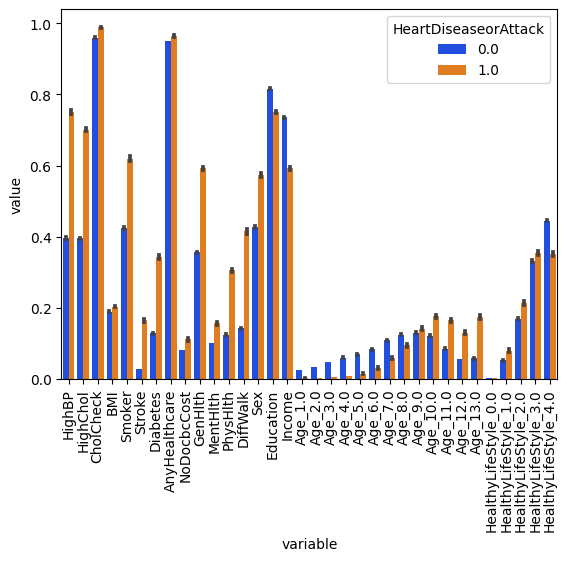

In [121]:
copy = dataset.copy()

ax3 = sb.barplot(data=pd.melt(copy, id_vars=['HeartDiseaseorAttack']), x='variable', y='value', hue='HeartDiseaseorAttack', palette="bright")

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

## III. Prediction models

1. Logistic Regression
2. Random Forest

### Train Test Split for Imbalanced Data

We split the dataset into 80-20 train test.

In [122]:
x = dataset.drop(columns = ['HeartDiseaseorAttack'], axis = 1)
y = dataset['HeartDiseaseorAttack']

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size=0.20)

### 1a. Baseline Logistic Regression Model for Imbalanced Data

We will compare model performance between imbalanced data versus under-sampling.
Imbalanced data model performance will serve as a baseline for comparison.

In [124]:
model = LogisticRegression(max_iter = 1000)
model.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [125]:
ypredict = model.predict(xtest)

In [126]:
accuracy = accuracy_score(ytest, ypredict) * 100
confusion_mat = confusion_matrix(ytest, ypredict)

In [127]:
print("Accuracy is", accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 90.63189845474614
Confusion Matrix
[[45373   485]
 [ 4268   610]]


In [128]:
# Check the model performance
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45858
         1.0       0.56      0.13      0.20      4878

    accuracy                           0.91     50736
   macro avg       0.74      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



### 1b. Random Undersampling for Imbalanced Dataset Logistic Regression Model

One method to deal with class imbalance is random undersampling where we reduce the size of the majority class such that it will have the same proportions as the minority class.

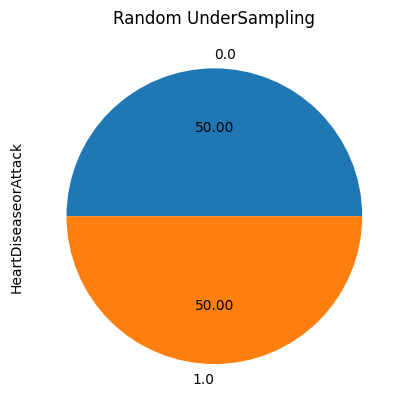

In [129]:
"""
Apply random undersampling on the entire preprocessed data
"""
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
x_rus, y_rus = rus.fit_resample(x, y)

ax = y_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Random UnderSampling")

In [130]:
# Looking at the new distribution
y_rus.value_counts()

0.0    23893
1.0    23893
Name: HeartDiseaseorAttack, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Create train test split from random undersampled data
x_train, x_test, y_train, y_test= train_test_split(x_rus, y_rus, test_size=0.20)

In [132]:
rus_model = LogisticRegression(max_iter = 1000)
rus_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [133]:
y_predict = rus_model.predict(x_test)

In [134]:
accuracy = accuracy_score(y_test, y_predict) * 100
confusion_mat = confusion_matrix(y_test, y_predict)

In [135]:
print("Accuracy is", accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 77.1604938271605
Confusion Matrix
[[3539 1209]
 [ 974 3836]]


In [136]:
# Check the model performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76      4748
         1.0       0.76      0.80      0.78      4810

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



### **We will now perform the same process using Random Forest Classifier**

### Train Test Split for Imbalanced Data

Create new test train split

In [137]:
x = dataset.drop(columns = ['HeartDiseaseorAttack'], axis = 1)
y = dataset['HeartDiseaseorAttack']

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.20)

### 2a. Baseline Random Forest Model for Imbalanced Data
We will compare model performance between imbalanced data versus under-sampling. Imbalanced data model performance will serve as a baseline for comparison.

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

random_forest = RandomForestClassifier(n_estimators = 500)
base_model = random_forest.fit(X_train, Y_train)
base_predict = base_model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, base_predict))

Accuracy: 0.8998147272153895


In [140]:
print(classification_report(Y_test, base_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95     45871
         1.0       0.41      0.11      0.17      4865

    accuracy                           0.90     50736
   macro avg       0.66      0.54      0.56     50736
weighted avg       0.86      0.90      0.87     50736



### 2b. Random Undersampling for Imbalanced Dataset Random Forest Model

One method to deal with class imbalance is random undersampling where we reduce the size of the majority class such that it will have the same proportions as the minority class.

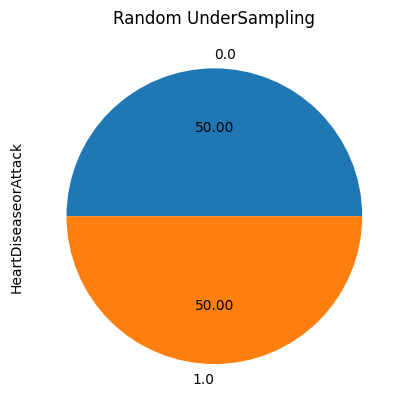

In [141]:
"""
Apply random undersampling on the entire preprocessed data
"""
from imblearn.under_sampling import RandomUnderSampler

rus_rf = RandomUnderSampler(sampling_strategy=1)

x_rus_rf, y_rus_rf = rus.fit_resample(x, y)

ax = y_rus_rf.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Random UnderSampling")

In [142]:
# Looking at the new distribution
y_rus_rf.value_counts()

0.0    23893
1.0    23893
Name: HeartDiseaseorAttack, dtype: int64

In [143]:
# Create train test split from random undersampled data
Xtrain, Xtest, Ytrain, Ytest= train_test_split(x_rus_rf, y_rus_rf, test_size=0.20)

In [144]:
"""
Calculate accruacy of random forest that employs random undersampling 
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

random_forest_2 = RandomForestClassifier(n_estimators = 500)
rus_model_2 = random_forest_2.fit(Xtrain, Ytrain)
rus_predict_2 = rus_model_2.predict(Xtest)
print("Accuracy:", metrics.accuracy_score(Ytest, rus_predict_2))

Accuracy: 0.7502615609960243


In [145]:
print(classification_report(Ytest, rus_predict_2))

              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      4752
         1.0       0.73      0.79      0.76      4806

    accuracy                           0.75      9558
   macro avg       0.75      0.75      0.75      9558
weighted avg       0.75      0.75      0.75      9558



### Analysis of prediction models:

## IV. Examine Feature Importance for both Logistic Regression and Random Forest Model

Feature importance are techniques that calculate a score for all input features for a given model.  Each score represents the importance of each feature so the higher the score, the more impact the feature has on the model.  In our project, we will be using coefficients assigned to each features to evaluate score importance.

Steps:
1. Obtain the coefficients/score for each feature.
2. Evaluate and remove features that have low score.

#### 1a. Feature scores for Logistic Regression

In [146]:
# feature coefficients
rus_model.coef_[0]

array([ 0.55351331,  0.63024535,  0.52096088,  0.178205  ,  0.37019633,
        1.03863303,  0.33570462, -0.01977951,  0.28537159,  1.98816372,
        0.14079281,  0.13884814,  0.31722318,  0.80169088,  0.00996214,
       -0.41094405, -1.38456988, -1.21229588, -0.89789486, -1.00203775,
       -0.68092969, -0.33589086,  0.002932  ,  0.20636911,  0.50235171,
        0.79282993,  1.09946448,  1.27787923,  1.64607062, -0.45761323,
        0.05688763,  0.09936888,  0.14576792,  0.16986698])

Feature: HighBP, Score: 0.55351
Feature: HighChol, Score: 0.63025
Feature: CholCheck, Score: 0.52096
Feature: BMI, Score: 0.17820
Feature: Smoker, Score: 0.37020
Feature: Stroke, Score: 1.03863
Feature: Diabetes, Score: 0.33570
Feature: AnyHealthcare, Score: -0.01978
Feature: NoDocbcCost, Score: 0.28537
Feature: GenHlth, Score: 1.98816
Feature: MentHlth, Score: 0.14079
Feature: PhysHlth, Score: 0.13885
Feature: DiffWalk, Score: 0.31722
Feature: Sex, Score: 0.80169
Feature: Education, Score: 0.00996
Feature: Income, Score: -0.41094
Feature: Age_1.0, Score: -1.38457
Feature: Age_2.0, Score: -1.21230
Feature: Age_3.0, Score: -0.89789
Feature: Age_4.0, Score: -1.00204
Feature: Age_5.0, Score: -0.68093
Feature: Age_6.0, Score: -0.33589
Feature: Age_7.0, Score: 0.00293
Feature: Age_8.0, Score: 0.20637
Feature: Age_9.0, Score: 0.50235
Feature: Age_10.0, Score: 0.79283
Feature: Age_11.0, Score: 1.09946
Feature: Age_12.0, Score: 1.27788
Feature: Age_13.0, Score: 1.64607
Feature: HealthyLifeStyl

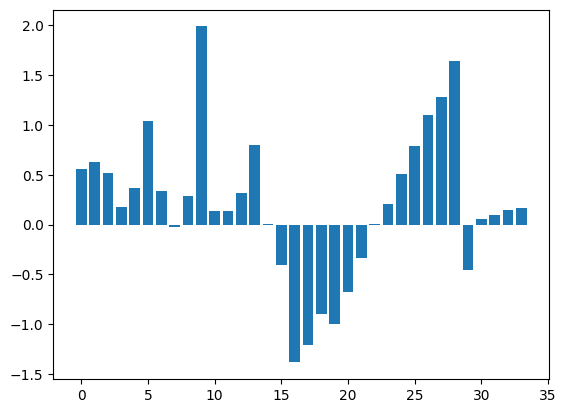

In [147]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

from matplotlib import pyplot

# get importance
importance = rus_model.coef_[0]

# column names
col_names = x.columns

# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %s, Score: %.5f' % (col_names[i],v))
 
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### 1b. Feature scores for Random Forest

Feature: HighBP, Score: 0.06752
Feature: HighChol, Score: 0.05149
Feature: CholCheck, Score: 0.00451
Feature: BMI, Score: 0.14481
Feature: Smoker, Score: 0.02572
Feature: Stroke, Score: 0.02563
Feature: Diabetes, Score: 0.03380
Feature: AnyHealthcare, Score: 0.00703
Feature: NoDocbcCost, Score: 0.01189
Feature: GenHlth, Score: 0.09729
Feature: MentHlth, Score: 0.04807
Feature: PhysHlth, Score: 0.07123
Feature: DiffWalk, Score: 0.03846
Feature: Sex, Score: 0.02969
Feature: Education, Score: 0.05708
Feature: Income, Score: 0.08491
Feature: Age_1.0, Score: 0.00201
Feature: Age_2.0, Score: 0.00335
Feature: Age_3.0, Score: 0.00523
Feature: Age_4.0, Score: 0.00760
Feature: Age_5.0, Score: 0.00687
Feature: Age_6.0, Score: 0.00924
Feature: Age_7.0, Score: 0.00991
Feature: Age_8.0, Score: 0.01112
Feature: Age_9.0, Score: 0.01260
Feature: Age_10.0, Score: 0.01424
Feature: Age_11.0, Score: 0.01530
Feature: Age_12.0, Score: 0.01608
Feature: Age_13.0, Score: 0.02502
Feature: HealthyLifeStyle_0.0, S

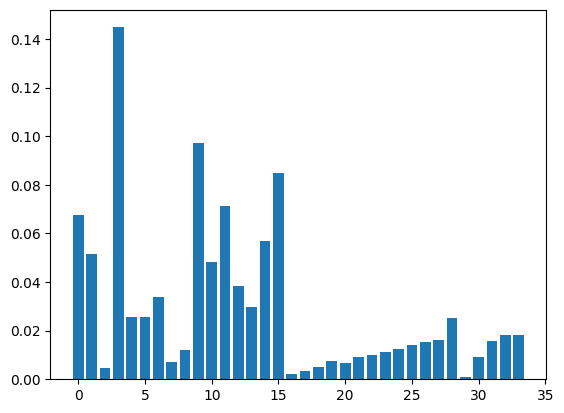

In [148]:
# get importance
importance_rf = rus_model_2.feature_importances_

# column names
col_names = x.columns

# summarize feature importance
for i,v in enumerate(importance_rf):
  print('Feature: %s, Score: %.5f' % (col_names[i],v))

# plot feature importance
pyplot.bar([x for x in range(len(importance_rf))], importance_rf)

pyplot.show()

#### 2. Get features above threshold importance (using RF importance scores)

In [149]:
# get threshold importance

import numpy as np

threshold_importance = np.percentile(importance_rf[1:], 80)

print(threshold_importance)

# array for important features
important_features = []

# column names
col_names = dataset.columns[1:]

# print important features
for i,v in enumerate(importance_rf):
  if v >= threshold_importance:
    important_features.append((col_names[i], v))

important_features

0.04422602484942148


[('HighBP', 0.06751940291545523),
 ('HighChol', 0.05148532084950339),
 ('BMI', 0.1448133209269324),
 ('GenHlth', 0.09728765156745858),
 ('MentHlth', 0.04807232395346226),
 ('PhysHlth', 0.07123450003213883),
 ('Education', 0.057075638738308634),
 ('Income', 0.08491112886898895)]

#### 3. Removing features that are below threshold importance score

In [150]:
# get updated dataset of important features
dataset_update = dataset[[feature[0] for feature in important_features]]
dataset_update

,HighBP,HighChol,BMI,GenHlth,MentHlth,PhysHlth,Education,Income
0,1.0,1.0,0.325581,1.00,0.6,0.500000,0.6,0.285714
1,0.0,0.0,0.151163,0.50,0.0,0.000000,1.0,0.000000
2,1.0,1.0,0.186047,1.00,1.0,1.000000,0.6,1.000000
3,1.0,0.0,0.174419,0.25,0.0,0.000000,0.4,0.714286
4,1.0,1.0,0.139535,0.25,0.1,0.000000,0.8,0.428571
...,...,...,...,...,...,...,...,...
253675,1.0,1.0,0.383721,0.50,0.0,0.166667,1.0,0.857143
253676,1.0,1.0,0.069767,0.75,0.0,0.000000,0.2,0.428571
253677,0.0,0.0,0.186047,0.00,0.0,0.000000,0.8,0.142857
253678,1.0,0.0,0.127907,0.50,0.0,0.000000,0.8,0.000000


In [151]:
# Perform undersampling and split into train and test sets
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

new_x = dataset_update
new_y = dataset.HeartDiseaseorAttack

new_rus = RandomUnderSampler(sampling_strategy=1)
new_x_res, new_y_res = new_rus.fit_resample(new_x, new_y)

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x_res, new_y_res, test_size=0.20)

In [152]:
# Train the model and predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

new_random_forest = RandomForestClassifier()
new_rf_model = new_random_forest.fit(new_x_train, new_y_train)
new_rf_predict = new_rf_model.predict(new_x_test)

print("Accuracy:", metrics.accuracy_score(new_y_test, new_rf_predict))

Accuracy: 0.6846620631931366


In [153]:
print(classification_report(new_y_test, new_rf_predict))

              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68      4789
         1.0       0.68      0.71      0.69      4769

    accuracy                           0.68      9558
   macro avg       0.69      0.68      0.68      9558
weighted avg       0.69      0.68      0.68      9558

